# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [2]:
import pandas as pd

# df = pd.read_csv('data/tennis.csv')

# print(df)

FileNotFoundError: [Errno 2] File data/tennis.csv does not exist: 'data/tennis.csv'

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

The following  columns appear to be normally distributed, as they pass our t-test null hypothesis where our alpha
Is 1e-09
         column        p-value      skew  pois_mean_var  is_nd
0          Apps  1.421322e-146  3.716557  -1.497546e+07  False
1        Accept  4.438456e-133  3.411126  -6.005941e+06  False
2        Enroll  8.535972e-101  2.685268  -8.625884e+05  False
3     Top10perc   1.684600e-43  1.410487  -2.836239e+02  False
4     Top25perc   5.663488e-07  0.258839  -3.364326e+02   True
5   F.Undergrad   3.099232e-96  2.605416  -2.352288e+07  False
6   P.Undergrad  8.270181e-199  5.681358  -2.316944e+06  False
7      Outstate   3.226045e-09  0.508294  -1.617422e+07   True
8    Room.Board   6.949330e-07  0.476434  -1.198386e+06   True
9         Books  4.396663e-142  3.478293  -2.671040e+04  False
10     Personal   4.068209e-70  1.739131  -4.570851e+05  False
11          PhD   9.739466e-16 -0.766686  -1.939484e+02  False
12     Terminal   5.426532e-16 -0.814965  -1.370451e+02  F

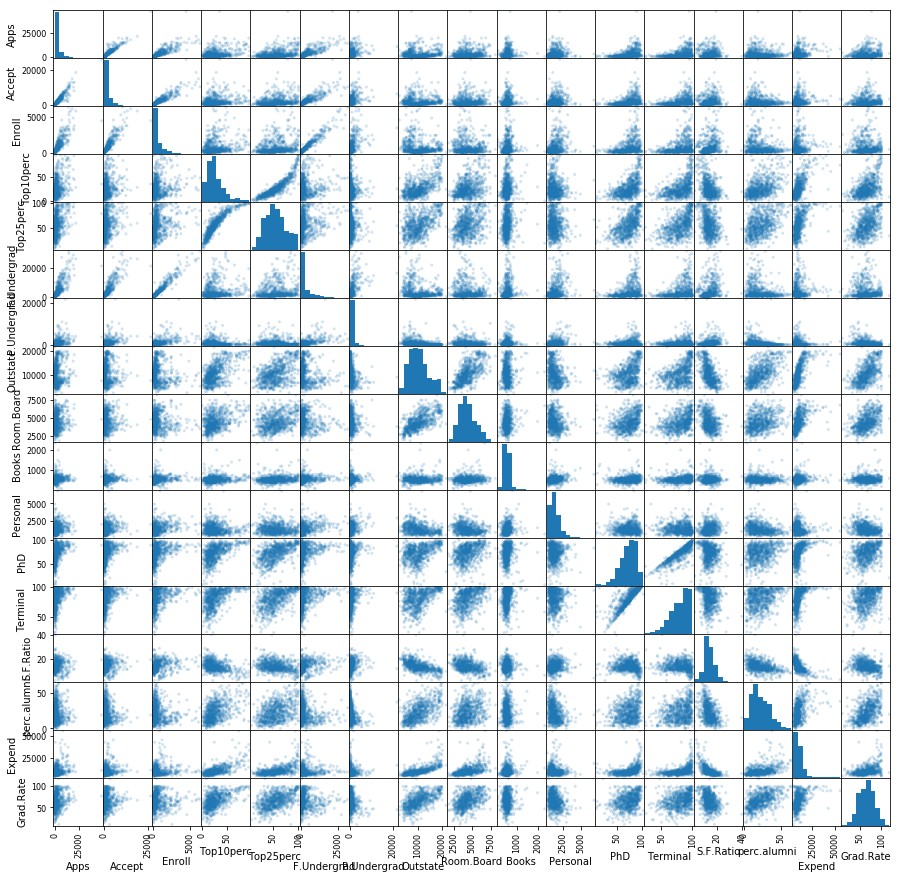

In [59]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats


df = pd.read_csv('data/college.csv')
cols = list(df.columns)
del cols[0]
del cols[0]

scatter_matrix(df, alpha = 0.2, figsize = (15, 15), diagonal = 'hist')

"""
NOTE:
Normality, and skewness, all depend on our arbitrary
convention for either of these thresholds.

Proof: cdf['skew'] shows none of the datasets are 'perfectly' normally distributed,
but we can notice that our "Normally" distributed sets as defined in cdf['is_nd']
have skew values much closer to 0 than those considered not normally distributed.

"""
alpha = 1e-9
cdf = pd.DataFrame({
    'column': cols
})

cdf['p-value'] = cdf.column.apply(lambda row: stats.normaltest(df[row])[1])
cdf['skew'] = cdf.column.apply(lambda row: stats.skew(df[row],axis=0))
"""
We use the dataset to feed the sample poisson set to compare against, ie, use the same mean
and the same length of data
"""
cdf['pois_mean_var'] = cdf.column.apply(lambda row: df[row].mean() - df[row].var())
cdf['is_nd'] = cdf['p-value'] > alpha
is_nd = cdf[cdf['is_nd'] == True]
print("The following  columns appear to be normally distributed, as they pass our t-test null hypothesis where our alpha")
print("Is {alpha}".format(alpha=alpha))
print(cdf)
print(is_nd)
"""
2.
The Unnamed column is not a distribution, it's just a list of unique names

The Private column is a binomial distribution (True or `false`), what 
makes binomial is the number of trials (is a college private or not)
occurs once for each college.
All other columns who were not of a normal distribution cdf[cdf['is_nd' == False]] 
seem to be either:
 - normal-skewed distributed
     - left: Toip10Perc, Perc.Alumni, SF.Ratio, Personnal, Books, Room.Board, Outstate
     - right: PhD, Terminal, Top25Perc
 - negative exponentially distributed : Apps, Accept, Enroll, P/F.Undergrad, Expend
 - positive exponential: terminal
"""

"""
3/4.
"""
non_nd = cdf[cdf['is_nd'] == False]
coeffs = pd.DataFrame({
    'A': [],
    'B': [],
    'coeff': []
})
for col_comb in combinations(non_nd.column, 2):
    coeffs = coeffs.append({
        'A': col_comb[0],
        'B': col_comb[1],
        'coeff': df[col_comb[0]].astype(int).corr(df[col_comb[1]].astype(int))
    }, ignore_index=True)
coeffs = coeffs.sort_values(by=['coeff'],ascending=False)
print("The three pairs of columns with the highgest coeffs are")
print(coeffs.nlargest(3,'coeff'))
print("The three pairs of columns with the lowest coeffs are")
print(coeffs.nsmallest (3,'coeff'))



### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

Text(0.5,0,'Private')

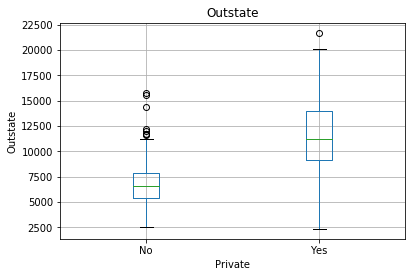

In [81]:
# print(df['Private'])
boxplot = df.boxplot(column=['Outstate'], by='Private')
boxplot.get_figure().suptitle('')
boxplot.set_ylabel('Outstate')
boxplot.set_xlabel('Private')

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [4]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
import csv

# filecsv
file_columns = []
file_rows = []

file_o = {}

with open('data/auto.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    counter = 0
    for row in spamreader:
        if counter == 0:
            for column in row:
                for item in column.split('\t'):
                    file_columns.append(item)
                    file_o[item] = []
            
            counter += 1
        else:
            if len(row) == 1:
                continue
            actual_row = []
            for char in row:
                if char != "":
                    temp_char = char
                    splits = temp_char.split('\t')
                    if len(splits) > 1:
                        for y in range(len(splits)):
                            splits[y] = splits[y].strip("'")
                            splits[y] = splits[y].strip('"')
                        actual_row = actual_row + splits#[split.strip('"')for split in splits]
                        continue
                    temp_char = temp_char.strip("'")
                    temp_char = temp_char.strip('"')
                    actual_row.append(temp_char)
            car_name = " ".join(actual_row[8:])
            del actual_row[8:]
            def handle_item(value):
                if value == '': return 0.
                elif value == '.':return 0.
                elif value == '?':return 0.
                return float(value)
            next_row = [handle_item(item) for item in actual_row[:8]]
            if len(next_row) == 7:
                next_row.append('1')
            next_row.append(car_name)
            file_rows.append(next_row)
            counter += 1


df = pd.DataFrame(data=file_rows, columns=file_columns)
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0        8.0         307.0       130.0  3504.0          12.0  70.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5  70.0   
2    18.0        8.0         318.0       150.0  3436.0          11.0  70.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0  70.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5  70.0   
5    15.0        8.0         429.0       198.0  4341.0          10.0  70.0   
6    14.0        8.0         454.0       220.0  4354.0           9.0  70.0   
7    14.0        8.0         440.0       215.0  4312.0           8.5  70.0   
8    14.0        8.0         455.0       225.0  4425.0          10.0  70.0   
9    15.0        8.0         390.0       190.0  3850.0           8.5  70.0   
10   15.0        8.0         383.0       170.0  3563.0          10.0  70.0   
11   14.0        8.0         340.0       160.0  3609.0          

# 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [10]:
quants = pd.DataFrame({
    'quant': file_columns[:len(file_columns)-3]
})

def apply_on(row):
    return pd.Series({
        'mean': df[row].mean(),
        'median': df[row].median(),
        'std': df[row].std()
    })

quants = quants.merge(quants.quant.apply(apply_on), left_index=True, right_index=True)

print(quants)

          quant         mean  median         std
0           mpg    23.515869    23.0    7.825804
1     cylinders     5.458438     4.0    1.701577
2  displacement   193.532746   146.0  104.379583
3    horsepower   103.153652    92.0   39.986602
4        weight  2970.261965  2800.0  847.904119
5  acceleration    15.555668    15.5    2.749995


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [29]:
df = df.drop(df.index[[10,85]])

quants_post = pd.DataFrame({
    'quant': file_columns[:len(file_columns)-3]
})

quants_post = quants_post.merge(quants_post.quant.apply(apply_on), left_index=True, right_index=True)

print(quants_post)
quants_post.fillna(0.0)
quants.fillna(0.0)
t_test = stats.ttest_rel(quants_post['mean'], quants['mean'])
alpha = 0.05
print(" ")
print("p-value of our means significance t-test is {v} (alpha = {a})".format(v=t_test[1],a=alpha))
print("The change in mean is not significant" if t_test[1] > 0.05 else "The change in mean is significant")

          quant         mean  median         std
0           mpg    23.980274    23.5    7.860078
1     cylinders     5.386301     4.0    1.680963
2  displacement   188.483562   140.0  101.455965
3    horsepower   101.156164    90.0   38.931332
4        weight  2947.024658  2790.0  838.976012
5  acceleration    15.681096    15.5    2.718728
 
p-value of our means significance t-test is 0.24319533802355106 (alpha = 0.05)
The change in mean is not significant


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




### 4.3 How many of the suburbs in this data set bound the Charles river?

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.


